# Open-Pit Mine Problem


***

# Dataset Jones
### Blocks file

In [ ]:
import pandas as pd
import gdown

# ID do arquivo no Google Drive
file_id = "1aIFBvg2iUlcQVey0crmbosjNrtpEq4R-"
output = "Jones.csv"  # ou .xlsx, .zip, etc.

# Baixar o arquivo
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)


Jones = "Jones.csv"
blockmodel = pd.read_csv(Jones, sep=',')

blockmodel = blockmodel.rename(columns={'X':'x', 'Y':'y', 'Z':'z', 'SPDE-Au-Mean':'au'})

blockmodel

Downloading...
From (original): https://drive.google.com/uc?id=1K3em5PEqpETUGzeCRCrJUJVjRXgfqY_-
From (redirected): https://drive.google.com/uc?id=1K3em5PEqpETUGzeCRCrJUJVjRXgfqY_-&confirm=t&uuid=e4303e88-ed45-4bef-8cc6-fa536038c398
To: c:\Users\Deivid\Downloads\Notebooks, caixote, indíces\Notebook Jones\Jones.csv
100%|██████████| 567M/567M [00:33<00:00, 17.0MB/s] 


ParserError: Error tokenizing data. C error: Expected 2 fields in line 411, saw 3


### Calculation of process, waste and block_value columns consecutively

In [ ]:
import time
import numpy as np

#Modificar NaN por 0
blockmodel['density'] = 2.5
blockmodel['mass'] = 2.5 * (10*10*10)

# Adicionar ID sequencial
blockmodel['id'] = range(1, len(blockmodel) + 1)

# Block model
code_start = time.time()

files_start = time.time()

# Fixed parameters
S_Price_Au = 96000
S_Cost_Au = 48000
Proc_cost = 24
Mine_cost = 37.5

# Calculate density
blockmodel['mass'] = (blockmodel['density'] * (10*10*10))

# Calculate process
blockmodel['process'] = (blockmodel['mass'] * ((blockmodel['au']/100) * (S_Price_Au-S_Cost_Au)) - blockmodel['mass']*(Proc_cost+Mine_cost))

# Calculate waste
blockmodel['wastes'] = -blockmodel['mass']*Mine_cost

# Modify Value column (Process Value if Process > 0, Waste otherwise)
blockmodel['value'] = np.where(blockmodel['process'] > 0, blockmodel['process'], blockmodel['wastes'])

df_backup = blockmodel.copy()

print(f"Files Time: {(time.time() - files_start)/60:,.1f} minutes")
blockmodel

colunas_ordenadas = ['id', 'x', 'y', 'z', 'au','density', 'mass', 'process', 'wastes', 'value']

blockmodel = blockmodel[colunas_ordenadas]

blockmodel

Files Time: 0.0 minutes


,id,x,y,z,au,density,mass,process,wastes,value
0,1,48615.24,98745.90,760.0,-99.0,2.5,2500.0,-118953750.0,-93750.0,-93750.0
1,2,48615.24,98745.90,770.0,-99.0,2.5,2500.0,-118953750.0,-93750.0,-93750.0
2,3,48615.24,98745.90,780.0,-99.0,2.5,2500.0,-118953750.0,-93750.0,-93750.0
3,4,48615.24,98745.90,790.0,-99.0,2.5,2500.0,-118953750.0,-93750.0,-93750.0
4,5,48615.24,98745.90,800.0,-99.0,2.5,2500.0,-118953750.0,-93750.0,-93750.0
...,...,...,...,...,...,...,...,...,...,...
4285219,4285220,51888.16,101228.82,1520.0,-99.0,2.5,2500.0,-118953750.0,-93750.0,-93750.0
4285220,4285221,51888.16,101228.82,1530.0,-99.0,2.5,2500.0,-118953750.0,-93750.0,-93750.0
4285221,4285222,51888.16,101228.82,1540.0,-99.0,2.5,2500.0,-118953750.0,-93750.0,-93750.0
4285222,4285223,51888.16,101228.82,1550.0,-99.0,2.5,2500.0,-118953750.0,-93750.0,-93750.0


### Conversão Coordenada Índice

In [ ]:
def coord2index(df, O, D, cols=['x', 'y', 'z']):
    data = [np.round((df[cols].iloc[:, i] + D[i]/2 - O[i]) / D[i] + 1e-6) for i in range(3)]
    return pd.DataFrame(data, index=['xi', 'yi', 'zi']).T.astype(int)

D = [10, 10, 10]  
O = [48615.24, 98745.90, 760]           

dados_em_index = coord2index(blockmodel, O, D)

blockmodel  = pd.concat([dados_em_index, blockmodel], axis = 1).round(2)

blockmodel.rename(
    columns={
        "process": "v_process",
        "wastes": "v_waste",
    },
    inplace=True
)

colunas_ordenadas = ['id', 'x', 'y', 'z','xi','yi','zi','au','density', 'mass','value', 'v_process', 'v_waste']

blockmodel = blockmodel[colunas_ordenadas]

blockmodel.to_csv("Jones.blocks.csv", index=False)

blockmodel

,id,x,y,z,xi,yi,zi,au,density,mass,value,v_process,v_waste
0,1,48615.24,98745.90,760.0,1,1,1,-99.0,2.5,2500.0,-93750.0,-118953750.0,-93750.0
1,2,48615.24,98745.90,770.0,1,1,2,-99.0,2.5,2500.0,-93750.0,-118953750.0,-93750.0
2,3,48615.24,98745.90,780.0,1,1,3,-99.0,2.5,2500.0,-93750.0,-118953750.0,-93750.0
3,4,48615.24,98745.90,790.0,1,1,4,-99.0,2.5,2500.0,-93750.0,-118953750.0,-93750.0
4,5,48615.24,98745.90,800.0,1,1,5,-99.0,2.5,2500.0,-93750.0,-118953750.0,-93750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285219,4285220,51888.16,101228.82,1520.0,328,249,77,-99.0,2.5,2500.0,-93750.0,-118953750.0,-93750.0
4285220,4285221,51888.16,101228.82,1530.0,328,249,78,-99.0,2.5,2500.0,-93750.0,-118953750.0,-93750.0
4285221,4285222,51888.16,101228.82,1540.0,328,249,79,-99.0,2.5,2500.0,-93750.0,-118953750.0,-93750.0
4285222,4285223,51888.16,101228.82,1550.0,328,249,80,-99.0,2.5,2500.0,-93750.0,-118953750.0,-93750.0


### Plotting the content graph caixote

Output()

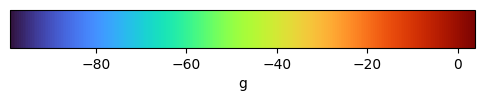

Espaçamento típico: dx=0.0, dy=0.0, dz=10.0


In [ ]:
import numpy as np
import pandas as pd
import k3d
import matplotlib.pyplot as plt

# Tamanho do bloco (ajuste conforme seu modelo)
block_size = 10

# Filtra blocos com valor válido
df_filtrado = blockmodel.dropna(subset=['au']).copy()

# Cria colunas de índice de bloco (discretização)
df_filtrado['xi'] = ((df_filtrado['x'] - df_filtrado['x'].min()) / block_size).astype(int)
df_filtrado['yi'] = ((df_filtrado['y'] - df_filtrado['y'].min()) / block_size).astype(int)
df_filtrado['zi'] = ((df_filtrado['z'] - df_filtrado['z'].min()) / block_size).astype(int)

# Normaliza os valores de g para 1–255 (evita índice 0)
min_val = df_filtrado['au'].min()
max_val = df_filtrado['au'].max()
df_filtrado['color_index'] = ((df_filtrado['au'] - min_val) / (max_val - min_val) * 254 + 1).astype(np.uint8)

# Paleta Turbo
def turbo_palette():
    cmap = plt.get_cmap('turbo')
    return [int('0x' + ''.join(f'{int(c*255):02x}' for c in cmap(i/255)[:3]), 16) for i in range(256)]

colors = turbo_palette()
colors[0] = colors[1]  # força índice 0 a ser azul escuro

# Define dimensões do grid
nx = df_filtrado['xi'].max() + 1
ny = df_filtrado['yi'].max() + 1
nz = df_filtrado['zi'].max() + 1

# Cria grid de cores e máscara
grid = np.zeros((nx, ny, nz), dtype=np.uint8)
mask = np.zeros((nx, ny, nz), dtype=bool)

for _, row in df_filtrado.iterrows():
    xi, yi, zi = int(row['xi']), int(row['yi']), int(row['zi'])
    grid[xi, yi, zi] = row['color_index']
    mask[xi, yi, zi] = True

# Corrige orientação para K3D: (z, y, x)
grid = np.transpose(grid, (2,1,0))
mask = np.transpose(mask, (2,1,0))
grid_masked = np.where(mask, grid, 0)

# Define limites reais para escala física
x_min, x_max = df_filtrado['x'].min(), df_filtrado['x'].max()
y_min, y_max = df_filtrado['y'].min(), df_filtrado['y'].max()
z_min, z_max = df_filtrado['z'].min(), df_filtrado['z'].max()
bounds = [
    x_min,
    x_min + nx * block_size,
    y_min,
    y_min + ny * block_size,
    z_min,
    z_min + nz * block_size
]


# Cria o plot interativo
plot = k3d.plot()
voxel_obj = k3d.voxels(grid_masked, color_map=colors, outlines=True, bounds=bounds)
plot += voxel_obj

# Adiciona legenda textual
label = k3d.text2d(f'g: {min_val:.2f} – {max_val:.2f}', position=[0.01, 0.99], color=0x000000, size=1.2)
plot += label
plot.display()

# Exibe a colorbar visual com matplotlib
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = plt.get_cmap('turbo')
norm = plt.Normalize(min_val, max_val)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')
cb.set_label('g')
plt.show()

dx = blockmodel['x'].diff().dropna().mode()[0]
dy = blockmodel['y'].diff().dropna().mode()[0]
dz = blockmodel['z'].diff().dropna().mode()[0]

print(f"Espaçamento típico: dx={dx}, dy={dy}, dz={dz}")



C:\Users\Deivid\AppData\Local\Temp\ipykernel_13116\1478512393.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['color_index'] = ((df_filtrado['au'] - min_val) / (max_val - min_val) * 254 + 1).astype(np.uint8)
C:\Users\Deivid\AppData\Local\Temp\ipykernel_13116\1478512393.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['color_hex'] = df_filtrado['color_index'].apply(lambda i: f'#{colors[i]:06x}')


Output()

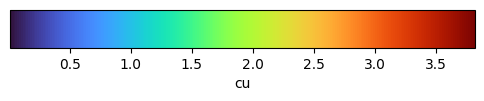

In [ ]:
import numpy as np
import pandas as pd
import k3d
import matplotlib.pyplot as plt

# Filtra blocos com valor válido
df_filtrado = blockmodel[blockmodel['au'] > 0]

# Normaliza os valores de cu para 1–255 (evita índice 0)
min_val = df_filtrado['au'].min()
max_val = df_filtrado['au'].max()
df_filtrado['color_index'] = ((df_filtrado['au'] - min_val) / (max_val - min_val) * 254 + 1).astype(np.uint8)

# Paleta Turbo
def turbo_palette():
    cmap = plt.get_cmap('turbo')
    return [int('0x' + ''.join(f'{int(c*255):02x}' for c in cmap(i/255)[:3]), 16) for i in range(256)]

colors = turbo_palette()
colors[0] = colors[1]  # força índice 0 a ser azul escuro

# Adiciona cor hexadecimal ao DataFrame
df_filtrado['color_hex'] = df_filtrado['color_index'].apply(lambda i: f'#{colors[i]:06x}')

# Define dimensões do grid
nx = df_filtrado['xi'].max() + 1
ny = df_filtrado['yi'].max() + 1
nz = df_filtrado['zi'].max() + 1

# Cria grid de cores e máscara
grid = np.zeros((nx, ny, nz), dtype=np.uint8)
mask = np.zeros((nx, ny, nz), dtype=bool)

for _, row in df_filtrado.iterrows():
    xi, yi, zi = int(row['xi']), int(row['yi']), int(row['zi'])
    grid[xi, yi, zi] = row['color_index']
    mask[xi, yi, zi] = True

# Corrige orientação para K3D: (z, y, x)
grid = np.transpose(grid, (2, 1, 0))
mask = np.transpose(mask, (2, 1, 0))
grid_masked = np.where(mask, grid, 0)

# Define limites reais para escala física
x_min, x_max = df_filtrado['x'].min(), df_filtrado['x'].max()
y_min, y_max = df_filtrado['y'].min(), df_filtrado['y'].max()
z_min, z_max = df_filtrado['z'].min(), df_filtrado['z'].max()
bounds = [x_min, x_max, y_min, y_max, z_min, z_max]

# Cria o plot interativo
plot = k3d.plot()
voxel_obj = k3d.voxels(grid_masked, color_map=colors, outlines=True, bounds=bounds)
plot += voxel_obj

# Adiciona legenda textual
label = k3d.text2d(f'cu: {min_val:.2f} – {max_val:.2f}', position=[0.01, 0.99], color=0x000000, size=1.2)
plot += label
plot.display()

# Exibe a colorbar visual com matplotlib
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = plt.get_cmap('turbo')
norm = plt.Normalize(min_val, max_val)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')
cb.set_label('cu')
plt.show()


### Plotting the mineral body content graph

import pyvista as pv
import numpy as np

pv.set_jupyter_backend("trame")

# Filtrar blocos válidos (AU > 0)
df_filtrado = blockmodel[blockmodel['au'] > 0].copy()
dx = dy = dz = 10

# Criar um dicionário rápido para checar existência de cubos vizinhos
occupied = set(zip(df_filtrado['x'], df_filtrado['y'], df_filtrado['z']))

all_points_list = []
all_cells_list = []
all_celltypes_list = []
values_list = []

point_id = 0

for row in df_filtrado.itertuples():
    x0, y0, z0 = row.x, row.y, row.z
    # Verifica se é um cubo externo
    neighbors = [
        (x0+dx, y0, z0), (x0-dx, y0, z0),
        (x0, y0+dy, z0), (x0, y0-dy, z0),
        (x0, y0, z0+dz), (x0, y0, z0-dz)
    ]
    if not all(n in occupied for n in neighbors):
        cube_pts = np.array([
            [x0,     y0,     z0],
            [x0+dx,  y0,     z0],
            [x0+dx,  y0+dy,  z0],
            [x0,     y0+dy,  z0],
            [x0,     y0,     z0+dz],
            [x0+dx,  y0,     z0+dz],
            [x0+dx,  y0+dy,  z0+dz],
            [x0,     y0+dy,  z0+dz]
        ], dtype=np.float32)
        all_points_list.append(cube_pts)
        all_cells_list.append([8] + list(range(point_id, point_id+8)))
        all_celltypes_list.append(12)  # VTK_VOXEL
        values_list.append(row.au)
        point_id += 8

# Converter para arrays
all_points = np.vstack(all_points_list)
all_cells = np.hstack(all_cells_list)
all_celltypes = np.array(all_celltypes_list)
values = np.array(values_list)

# Criar UnstructuredGrid
grid = pv.UnstructuredGrid(all_cells, all_celltypes, all_points)
grid.cell_data["au"] = values

# Plotagem
plotter = pv.Plotter(window_size=[1280, 720])
plotter.add_mesh(
    grid,
    scalars="au",
    cmap="turbo",
    show_edges=True,
    line_width=0.5,
    #smooth_shading=True,
    lighting=True
)
plotter.camera_position = 'iso'
plotter.show()
